In [61]:
import numpy as np

In [62]:
from keras.applications import ResNet50, InceptionV3, Xception, VGG16, VGG19

In [63]:
from keras.applications import imagenet_utils
from keras.applications.inception_v3 import preprocess_input

In [64]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img

# 모델 사전 정의

In [65]:
MODELS = {
    "vgg16": VGG16,
    "vgg19": VGG19,
    "inception": InceptionV3,
    "xception": Xception,
    "resnet": ResNet50,
}

In [66]:
model_selected = "resnet"
print model_selected

resnet


# 입력 이미지의 크기 초기화

In [67]:
# VGG, ResNet은 사이즈 (224,224)이며 표준 전처리
# Inception, Xception은 사이즈 (299,299)이며 별도의 전처리

if MODELS[model_selected] in [VGG16, VGG19, ResNet50]:
    inputShape = (224,224)
    preprocess = imagenet_utils.preprocess_input
elif MODELS[model_selected] in [InceptionV3, Xception]:
    inputShape = (299,299)
    preprocess = preprocess_input

In [68]:
print inputShape

(224, 224)


# 모델 불러오기
디스크에 저장되어 있는 Pre-trained model의 weight를 로드하여 우리의 모델을 인스턴스화해 준다.

In [69]:
print "미리 학습된 '{}' 모델을 로드하고 있습니다...".format(model_selected)
Network = MODELS[model_selected]
model = Network(weights="imagenet")

미리 학습된 'resnet' 모델을 로드하고 있습니다...


# Classifiy할 이미지를 준비하고 보여주자

In [70]:
image_selected = "./prius.png"

### 이미지 준비

In [71]:
print "'{}' 이미지를 로드하여 전처리하고 있습니다...".format(image_selected)
image1 = load_img(image_selected, target_size=inputShape)
image2 = img_to_array(image1) # (224,224,3)
image3 = np.expand_dims(image2, axis=0) # (1,224,224,3)
image4 = preprocess(image3) # 전처리 (평균 빼주기, 스케일링)

'./prius.png' 이미지를 로드하여 전처리하고 있습니다...


### 이미지 보여주기

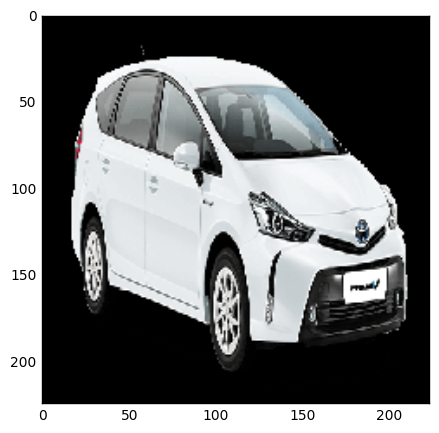

In [72]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0,5.0)
plt.imshow(image1)

# 이제 이미지를 classify해 주자

In [73]:
print "[INFO] 이미지를 분류하고 있습니다...".format(model_selected)
preds = model.predict(image4)
P = imagenet_utils.decode_predictions(preds)

for i, (imagenetID, label, prob) in enumerate(P[0]):
    print "{}. {}: {:.2f}%".format(i+1, label, prob*100)

[INFO] 이미지를 분류하고 있습니다...
1. minivan: 98.05%
2. minibus: 1.05%
3. cab: 0.35%
4. police_van: 0.12%
5. car_wheel: 0.11%
